In [1]:
import json
import json_helper as jhlp
import matplotlib.pyplot as plt
import os
%matplotlib inline
import random as rnd
import numpy as np
from rake_topic_extraction import Rake
topic_extractor = Rake('SmartStoplist.txt')

In [2]:
plt.style.use('ggplot')

In [3]:
scripts_path = '/home/vishi/imsdb2'
txt_names = [scripts_path + '/' + name for name in os.listdir(scripts_path)]
script_texts = []
movie_names = []
for txt in txt_names:
    with open(txt) as f:
        lines = f.readlines()
        data = []
        for i,l in enumerate(lines):
            temp = l.replace('<b>','').replace('</b>','').replace('\n','')
            if temp != '':
                data.append(temp)
        script_texts.append(data)
        name = txt.split('/')[-1].split('.')[0]
        movie_names.append(name)

In [4]:
movie_text_all = []
movie_text_by_scene = []

num_bins = 100
for script_lines in script_texts:
    movie_text_all.append(' '.join([l.strip() for l in script_lines]))
    txt_by_sc = []
    for i in range(num_bins):
        bin_size = len(script_lines)/num_bins
        txt_by_sc.append(' '.join([l.strip() for l in script_lines[i*bin_size:(i+1)*bin_size]]))
    movie_text_by_scene.append(txt_by_sc)

In [5]:
print len(movie_text_all)
print len(movie_text_by_scene)
print len(movie_names)

946
946
946


In [6]:
#print movie_text_all[0]
print movie_text_by_scene[0][0]

STIR OF ECHOES Written by David Koepp Based on the novel  Richard Matheson March 26, 1998   Sometimes within the brain's old ghostly house, I hear, far off, at some forgotten door, A music and an eerie faint carouse And stir of echoes down the creaking floor. "Chambers of Imagery" Archibald MacLeish   In the black, a child HUMS. Gentle WATER sounds. FADE IN: INT A BATHROOM NIGHT JAKE, a four year old boy, sits in a bathtub. The door to thi bathroom is open and his mother is visible in the background, walking back and forth in the bedroom, getting dressed to go out. The STEREO is blaring in the bedroom, the music echoes off the tile in the tiny bathroom. Jake is playing with a plastic airplane. He answers a question. JAKE YES (PAUSE) Sometimes. (PAUSE) With my toys. He looks up, but we're close in on him and can't see who he's looking at. JAKE (cont'd) My... blue sword. No! The one with the gray tape around the middle. That one. He lands the airplane on the water. He giggles. JAKE (coas

In [7]:
def get_scene_weight(movie_keywords, movie_id, scene_id):
    keyword_extractor = Rake('SmartStoplist.txt')
    scene_keywords = keyword_extractor.run(movie_text_by_scene[movie_id][scene_id])
    topic_overlap = len([1 for w in movie_keywords if w in scene_keywords])
    return topic_overlap

In [8]:
topic_overlaps_for_movie = []

width = 0.8
for i in range(len(movie_names)):
    movie_keywords = topic_extractor.run(movie_text_all[i])
    weights = [get_scene_weight(movie_keywords, i, j) for j in range(num_bins)]
    topic_overlaps_for_movie.append(weights)

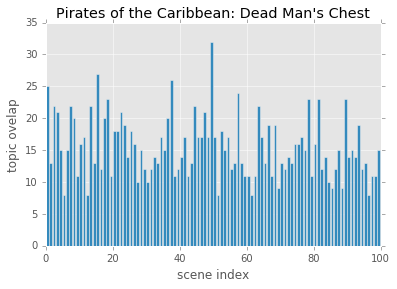

In [14]:
#plt.figure(figsize=(10,5))
mname = 'Pirates of the Caribbean: Dead Man\'s Chest'
bplot = plt.bar(range(num_bins), topic_overlaps_for_movie[movie_names.index(mname)])
plt.xlabel('scene index')
plt.ylabel('topic ovelap')
plt.title(mname)
plt.show()

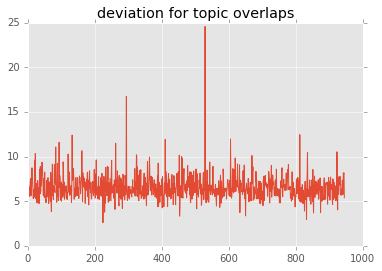

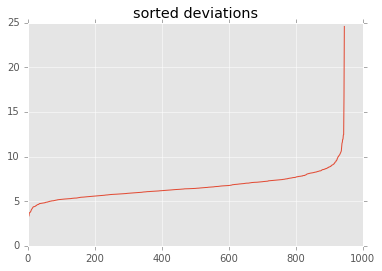

In [21]:
stds = [np.std(wt) for wt in topic_overlaps_for_movie]
plt.plot(range(len(stds)), stds)
plt.title('deviation for topic overlaps')
plt.show()

plt.plot(range(len(stds)), sorted(stds))
plt.title('sorted deviations')
plt.show()



In [15]:
distributions_for_movie = []
for overlap in topic_overlaps_for_movie:
    dist = []
    for i in range(num_bins/10):
        dist.append(np.mean(overlap[i*10:(i+1)*10]))
    distributions_for_movie.append(dist)

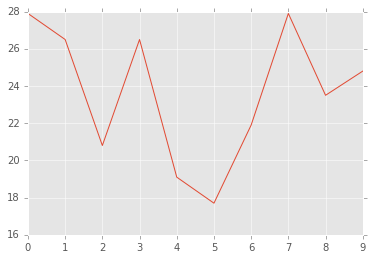

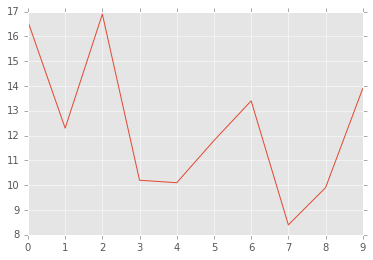

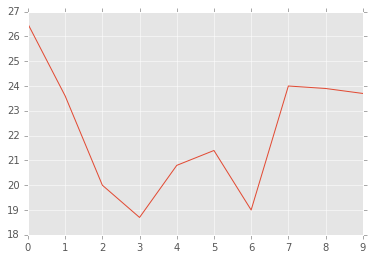

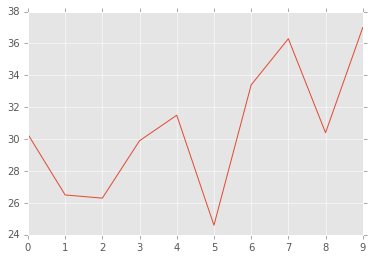

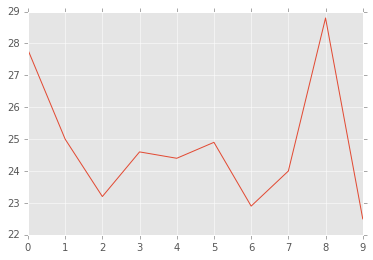

In [42]:
plt.style.use('ggplot')

plt.plot(range(10), distributions_for_movie[50]); plt.show()
plt.plot(range(10), distributions_for_movie[100]); plt.show()
plt.plot(range(10), distributions_for_movie[150]); plt.show()
plt.plot(range(10), distributions_for_movie[250]); plt.show()
plt.plot(range(10), distributions_for_movie[500]); plt.show()

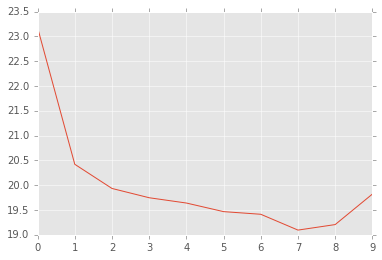

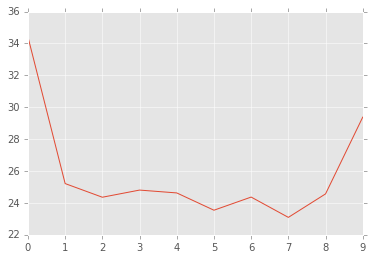

In [18]:
plt.plot(range(10), np.mean(distributions_for_movie, 0)); plt.show()
plt.plot(range(10), np.var(distributions_for_movie, 0)); plt.show()

In [54]:
import pandas as pd
dat = [[movie_names[i]]+distributions_for_movie[i] for i in range(len(movie_names))]
df = pd.DataFrame(dat)
df

,0,1,2,3,4,5,6,7,8,9,10
0,Stir of Echoes,21.3,22.2,21.5,24.1,21.9,22.7,23.8,18.9,23.2,22.7
1,Rachel Getting Married,20.4,21.1,20.4,22.6,19.3,19.3,19.7,22.3,27.8,20.6
2,Brick,16.7,17.6,18.7,16.2,19.7,18.4,17.3,13.0,12.7,15.9
3,Avatar,32.1,27.3,24.2,24.1,26.7,23.9,22.4,24.3,24.0,22.5
4,Leviathan,21.0,18.5,18.0,15.3,15.9,13.0,18.6,13.1,13.6,18.5
5,Man Trouble,24.7,27.4,28.8,23.6,24.9,28.9,25.2,25.5,26.2,27.7
6,Grand Theft Parsons,22.8,18.8,17.1,18.1,14.8,19.6,17.6,18.2,18.2,19.0
7,Inventing the Abbotts,26.6,19.1,20.0,18.0,20.5,17.6,13.0,18.5,15.7,19.4
8,Donnie Brasco,28.6,23.4,21.9,21.5,23.9,21.1,21.6,18.9,24.0,25.1
9,Get Low,20.3,13.9,12.1,15.6,14.6,12.1,12.7,12.5,15.2,16.3


In [55]:
import cPickle as pickle
with open('topic_overlap.pkl', 'w') as fp:
    pickle.dump(df, fp)

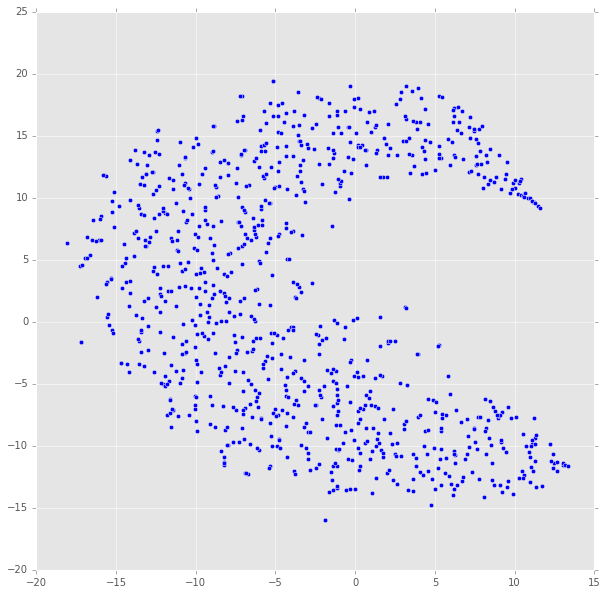

In [25]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=0)
tsne_op = tsne_model.fit_transform(distributions_for_movie)
plt.figure(figsize=(10,10))
plt.scatter(tsne_op[:,0], tsne_op[:,1])
plt.show()

In [ ]:
data = []
names = emotion_dict.keys()
for i in range(len(emotion_dict)):
    data.append([names[i]] + [k for k in X[i]])